In [1]:
from PIL import Image
from sklearn.model_selection import train_test_split
import os
import matplotlib.pyplot as plt
import cv2
import pandas as pd
import seaborn as sns
import numpy as np
import tensorflow as tf

2024-03-03 20:17:48.288791: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-03 20:17:48.288911: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-03 20:17:48.445774: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
train_dir = '/kaggle/input/100-bird-species/train'
test_dir = '/kaggle/input/100-bird-species/test'
valid_dir = '/kaggle/input/100-bird-species/valid'

# Visualize dataset

In [3]:
import os

data_dir = "/kaggle/input/100-bird-species" 

class_dirs = os.listdir(os.path.join(data_dir, "train"))
num_species = len(class_dirs)
print("Number of species:", num_species)

Number of species: 525


In [4]:
from pathlib import Path
image_dir = Path(data_dir)

filepaths = list(image_dir.glob(r'**/*.JPG')) + list(image_dir.glob(r'**/*.jpg')) + list(image_dir.glob(r'**/*.png')) + list(image_dir.glob(r'**/*.png'))

labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1], filepaths))

filepaths = pd.Series(filepaths, name='Filepath').astype(str)
labels = pd.Series(labels, name='Label')

image_df = pd.concat([filepaths, labels], axis=1)


In [5]:
train_dir = '/kaggle/input/100-bird-species/train'
training_info = {}
for class_name in os.listdir(train_dir):
    cpath = os.path.join(train_dir, class_name)
    training_info[class_name] = len(os.listdir(cpath))

In [6]:
top_species = sorted(training_info, key=training_info.get, reverse=True)[:5]
for i in top_species:
    print(i, training_info[i])

RUFOUS TREPE 263
HOUSE FINCH 248
OVENBIRD 233
D-ARNAUDS BARBET 233
ASIAN GREEN BEE EATER 220


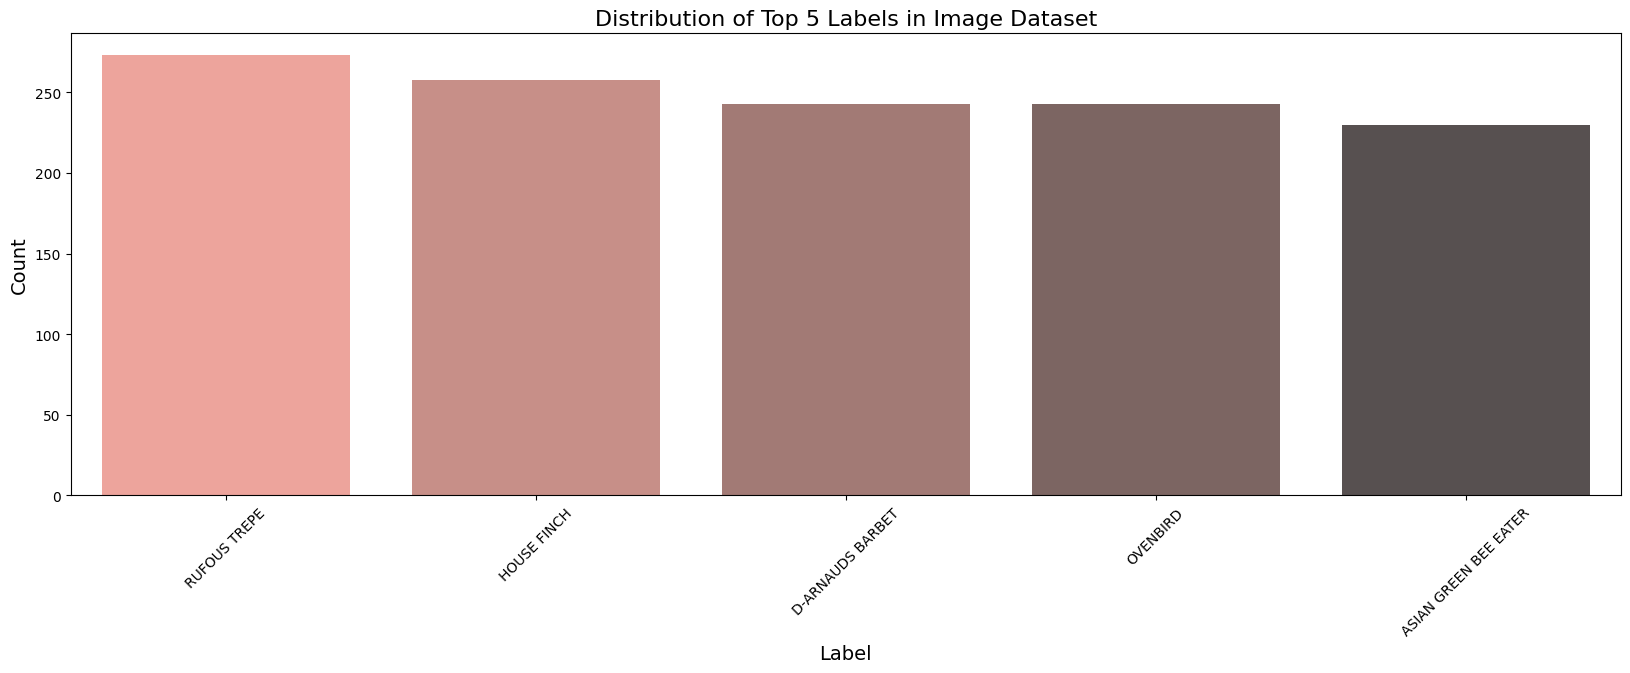

In [7]:
label_counts = image_df['Label'].value_counts()[:5]

plt.figure(figsize=(20, 6))
sns.barplot(x=label_counts.index, y=label_counts.values, alpha=0.8, palette='dark:salmon_r')
plt.title('Distribution of Top 5 Labels in Image Dataset', fontsize=16)
plt.xlabel('Label', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45)
plt.show()

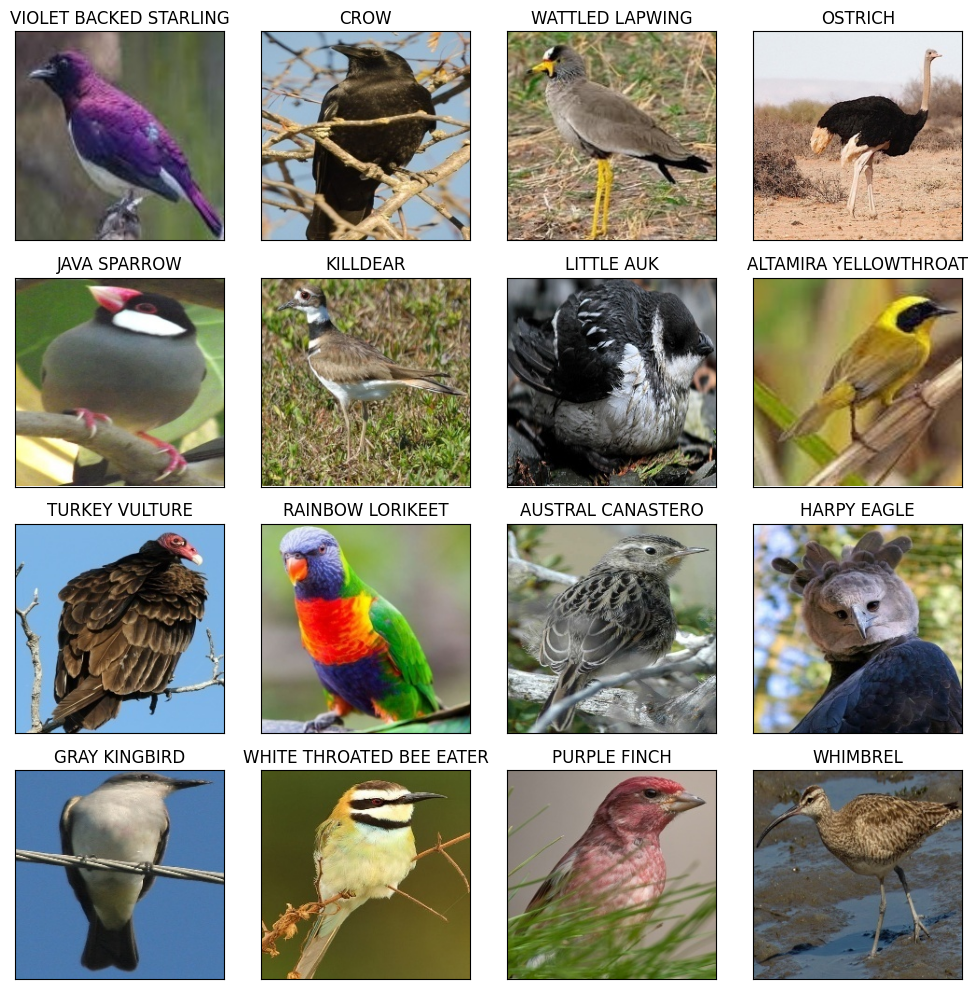

In [8]:
# Display 16 picture of the dataset with their labels
random_index = np.random.randint(0, len(image_df), 16)
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(10, 10),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(image_df.Filepath[random_index[i]]))
    ax.set_title(image_df.Label[random_index[i]])
plt.tight_layout()
plt.show()

# Preporcessing dataset

In [9]:
# Data generators with preprocessing steps
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale = 1/255.0,
    rotation_range = 40,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    vertical_flip = True,
    fill_mode = 'nearest'
)

valid_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale = 1/255.0,
    horizontal_flip = True,
    vertical_flip = True
)

test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale = 1/255.0,
    horizontal_flip = True,
    vertical_flip = True
)


In [10]:

train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size = (225, 225),
    batch_size = 32,
    class_mode = 'categorical',
    shuffle = True
)

valid_data = valid_datagen.flow_from_directory(
    valid_dir,
    target_size = (225, 225),
    batch_size = 32,
    class_mode = 'categorical',
    shuffle = True
)

test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size = (225, 225),
    batch_size = 32,
    class_mode = 'categorical',
    shuffle = True
)


Found 84635 images belonging to 525 classes.
Found 2625 images belonging to 525 classes.
Found 2625 images belonging to 525 classes.


In [11]:
print("Train Data Generator Properties:")
print("Number of batches:", len(train_data))
print("Number of samples per batch:", train_data.batch_size)
print("Target size of images:", train_data.target_size)


Train Data Generator Properties:
Number of batches: 2645
Number of samples per batch: 32
Target size of images: (225, 225)


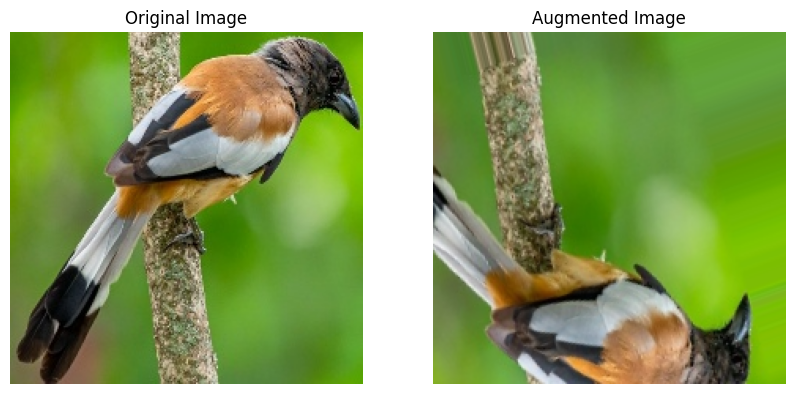

In [12]:
import os
import random

# Choose a random image from the training directory
class_names = os.listdir(train_dir)
random_class = random.choice(class_names)
random_image = random.choice(os.listdir(os.path.join(train_dir, random_class)))

# Load and plot the original and augmented images
original_image_path = os.path.join(train_dir, random_class, random_image)
original_image = plt.imread(original_image_path)

augmented_image = train_datagen.random_transform(original_image)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(original_image)
plt.title("Original Image")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(augmented_image)
plt.title("Augmented Image")
plt.axis("off")

plt.show()
